In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Our goal is to predict the operating condition of a waterpoint for each record in the dataset and we are provided with the following set of information about the waterpoints.

In [2]:
pd.set_option('display.max_column', None)

df1 = pd.read_csv("Water_Training_set_values.csv")
df2 = pd.read_csv("Water_Training_set_labels.csv")
df3 = pd.read_csv("Water_Test_set_values.csv")

In [3]:
df1

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin    subvillage       region  region_code  \
0                   Lake Nyasa      Mnyusi B       Iringa           11   
1                Lake Victoria       Nyamara         Mara           20   
2                      Pangani       Majengo      Manyara           21   
3      Ruvuma / Southern Coast    Mahakamani       Mtwara           90   
4                Lake Victoria    Kyanyamisa       Kagera           18   
...                        ...           ...          ...          ...   
59395                  Pangani      Kiduruni  Kilimanjaro            3   
59396                   Rufiji      Igumbilo       Iringa           11   
59397                   Rufiji     Madungulu        Mbeya           12   
59398                   Rufiji        Mwinyi       Dodoma            1   
59399              Wami / Ruvu  Kikatanyemba     Morogoro            5   

       district_code             lga              ward  population  \
0                  5          Ludewa          Mundindi         109   
1                  2       Serengeti             Natta         280   
2                  4       Simanjiro           Ngorika         250   
3                 63        Nanyumbu          Nanyumbu          58   
4                  1         Karagwe        Nyakasimbi           0   
...              ...             ...               ...         ...   
59395              5             Hai  Masama Magharibi         125   
59396              4          Njombe            Ikondo          56   
59397              7         Mbarali           Chimala           0   
59398              4        Chamwino      Mvumi Makulu           0   
59399              2  Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management  \
0               True  GeoData Consultants Ltd               VWC   
1                NaN  GeoData Consultants Ltd             Other   
2               True  GeoData Consultants Ltd               VWC   
3               True  GeoData Consultants Ltd               VWC   
4               True  GeoData Consultants Ltd               NaN   
...              ...                      ...               ... 

### The features in this dataset:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private - no information (blank description)
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

In [4]:
df2

id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]

In [5]:
df3

id  amount_tsh date_recorded                  funder  gps_height  \
0      50785         0.0    2013-02-04                    Dmdd        1996   
1      51630         0.0    2013-02-04  Government Of Tanzania        1569   
2      17168         0.0    2013-02-01                     NaN        1567   
3      45559         0.0    2013-01-22              Finn Water         267   
4      49871       500.0    2013-03-27                  Bruder        1260   
...      ...         ...           ...                     ...         ...   
14845  39307         0.0    2011-02-24                  Danida          34   
14846  18990      1000.0    2011-03-21                    Hiap           0   
14847  28749         0.0    2013-03-04                     NaN        1476   
14848  33492         0.0    2013-02-18                 Germany         998   
14849  68707         0.0    2013-02-13  Government Of Tanzania         481   

        installer  longitude   latitude                 wpt_name  num_private  \
0            DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1             DWE  36.656709  -3.309214                  Kimnyak            0   
2             NaN  34.767863  -5.004344           Puma Secondary            0   
3      FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4          BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   
...           ...        ...        ...                      ...          ...   
14845          Da  38.852669  -6.582841                Kwambwezi            0   
14846        HIAP  37.451633  -5.350428         Bonde La Mkondoa            0   
14847         NaN  34.739804  -4.585587                  Bwawani            0   
14848         DWE  35.432732 -10.584159                 Kwa John            0   
14849  Government  34.765054 -11.226012         Kwa Mzee Chagala            0   

                         basin   subvillage   region  region_code  \
0                     Internal       Magoma  Manyara           21   
1                      Pangani      Kimnyak   Arusha            2   
2                     Internal        Msatu  Singida           13   
3      Ruvuma / Southern Coast   Kipindimbi    Lindi           80   
4      Ruvuma / Southern Coast      Losonga   Ruvuma           10   
...                        ...          ...      ...          ...   
14845              Wami / Ruvu        Yombo    Pwani            6   
14846                  Pangani      Mkondoa    Tanga            4   
14847                 Internal       Juhudi  Singida           13   
14848               Lake Nyasa  Namakinga B   Ruvuma           10   
14849               Lake Nyasa        Kamba   Ruvuma           10   

       district_code            lga          ward  population public_meeting  \
0                  3          Mbulu        Bashay         321           True   
1                  2   Arusha Rural      Kimnyaki         300           True   
2                  2  Singida Rural          Puma         500           True   
3                 43         Liwale       Mkutano         250            NaN   
4                  3         Mbinga  Mbinga Urban          60            NaN   
...              ...            ...           ...         ...            ...   
14845              1       Bagamoyo         Yombo          20           True   
14846              7        Kilindi       Mvungwe        2960           True   
14847              2  Singida Rural       Ughandi         200           True   
14848              2   Songea Rural      Maposeni         150           True   
14849              3         Mbinga    Mbamba bay          40           True   

                   recorded_by scheme_management                scheme_name  \
0      GeoData Consultants Ltd        Parastatal                        NaN   
1      GeoData Consultants Ltd               VWC             TPRI pipe line   
2      GeoData Consultants Ltd               VWC                         

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

We see that columns "funder", "installer", "subvillage", "public_meeting", "scheme_management", "scheme_name" and "permit" have missing values which will need to be imputed after checking the appropriate fill options or else drop them completely to avoid incorrect manual data imputation.

In [8]:
df1.nunique().sort_values().to_frame("Unique Values")

Unique Values
recorded_by                        1
permit                             2
public_meeting                     2
source_class                       3
quantity_group                     5
quantity                           5
management_group                   5
quality_group                      6
waterpoint_type_group              6
source_type                        7
payment_type                       7
payment                            7
waterpoint_type                    7
extraction_type_class              7
water_quality                      8
basin                              9
source                            10
scheme_management                 11
management                        12
extraction_type_group             13
extraction_type                   18
district_code                     20
region                            21
region_code                       27
construction_year                 55
num_private                       65
amount_tsh                        98
lga                              125
date_recorded                    356
population                      1049
funder                          1896
ward                            2092
installer                       2145
gps_height                      2428
scheme_name                     2695
subvillage                     19287
wpt_name                       37399
longitude                      57516
latitude                       57517
id                             59400

The column "recorded_by" has a single value in all the columns therefore it won't contribute into any analysis or learning similarly the column "id" has all records with unique value required as a primary key to join the labels data and therefore does not contribute for any productive analysis or learning.

In [9]:
pd.crosstab(df2.status_group, df1.permit)

permit                   False  True 
status_group                         
functional                9045  21541
functional needs repair   1320   2697
non functional            7127  14614

In [10]:
pd.crosstab(df2.status_group, df1.water_quality)

water_quality            coloured  fluoride  fluoride abandoned  milky  salty  \
status_group                                                                    
functional                    246       151                   6    438   2220   
functional needs repair        54        13                   0     14    225   
non functional                190        36                  11    352   2411   

water_quality            salty abandoned   soft  unknown  
status_group                                              
functional                           174  28760      264  
functional needs repair               72   3904       35  
non functional                        93  18154     1577

In [11]:
pd.crosstab(df2.status_group, df1.management)

management               company  other  other - school  parastatal  \
status_group                                                          
functional                   267    505              23        1020   
functional needs repair       15     55               1         211   
non functional               403    284              75         537   

management               private operator  trust  unknown    vwc  \
status_group                                                       
functional                           1476     46      224  20425   
functional needs repair                44      6       27   2791   
non functional                        451     26      310  17291   

management               water authority  water board   wua   wug  
status_group                                                       
functional                           446         2170  1751  3906  
functional needs repair               52          265   205   645  
non functional                       406          498   579  1964

In [12]:
# checking for 'id' values in train and test data if there are same or different

matching_rows = pd.merge(df1, df3, on='id', suffixes=('_df1', '_df3'), how='inner')

if not matching_rows.empty:
    print("Matching rows with 'id' records between df1 and df3:\n")
    print(matching_rows)
else:
    print("There are no matching 'id' records between df1 and df3.")

There are no matching 'id' records between df1 and df3.


In [13]:
# Merging df1 and df2 dataframe on the column 'id' while checking if there are any mismatching records as well

merged_rows = pd.merge(df1, df2, on='id', suffixes=('_df1', '_df2'), how='inner')

if not merged_rows.empty:
    print("Matching rows with 'id' records between df1 and df2:")
    print(merged_rows)
else:
    print("There are no matching 'id' records between df1 and df2.")

Matching rows with 'id' records between df1 and df2:
          id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             

In [14]:
merged_rows

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin    subvillage       region  region_code  \
0                   Lake Nyasa      Mnyusi B       Iringa           11   
1                Lake Victoria       Nyamara         Mara           20   
2                      Pangani       Majengo      Manyara           21   
3      Ruvuma / Southern Coast    Mahakamani       Mtwara           90   
4                Lake Victoria    Kyanyamisa       Kagera           18   
...                        ...           ...          ...          ...   
59395                  Pangani      Kiduruni  Kilimanjaro            3   
59396                   Rufiji      Igumbilo       Iringa           11   
59397                   Rufiji     Madungulu        Mbeya           12   
59398                   Rufiji        Mwinyi       Dodoma            1   
59399              Wami / Ruvu  Kikatanyemba     Morogoro            5   

       district_code             lga              ward  population  \
0                  5          Ludewa          Mundindi         109   
1                  2       Serengeti             Natta         280   
2                  4       Simanjiro           Ngorika         250   
3                 63        Nanyumbu          Nanyumbu          58   
4                  1         Karagwe        Nyakasimbi           0   
...              ...             ...               ...         ...   
59395              5             Hai  Masama Magharibi         125   
59396              4          Njombe            Ikondo          56   
59397              7         Mbarali           Chimala           0   
59398              4        Chamwino      Mvumi Makulu           0   
59399              2  Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management  \
0               True  GeoData Consultants Ltd               VWC   
1                NaN  GeoData Consultants Ltd             Other   
2               True  GeoData Consultants Ltd               VWC   
3               True  GeoData Consultants Ltd               VWC   
4               True  GeoData Consultants Ltd               NaN   
...              ...                      ...               ... 

In [15]:
merged_rows.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [16]:
round(((merged_rows.isnull().sum() / len(merged_rows)) * 100), ndigits=2) # percentage of missing data

id                        0.00
amount_tsh                0.00
date_recorded             0.00
funder                    6.12
gps_height                0.00
installer                 6.15
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
basin                     0.00
subvillage                0.62
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
population                0.00
public_meeting            5.61
recorded_by               0.00
scheme_management         6.53
scheme_name              48.50
permit                    5.14
construction_year         0.00
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_type              0.00
water_quality             0.00
quality_

Have noticed that column name "scheme_name" has 48.50% of missing values in it therefore will be dropping the column instead of performing any imputations for it as the majority data is not present and filling them manually will only lead to dummy records.

In [17]:
merged_rows.status_group.value_counts() # target column distinct values

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [18]:
df3.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [19]:
round(((df3.isnull().sum() / len(df3)) * 100), ndigits=2)

id                        0.00
amount_tsh                0.00
date_recorded             0.00
funder                    5.86
gps_height                0.00
installer                 5.91
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
basin                     0.00
subvillage                0.67
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
population                0.00
public_meeting            5.53
recorded_by               0.00
scheme_management         6.53
scheme_name              48.77
permit                    4.96
construction_year         0.00
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_type              0.00
water_quality             0.00
quality_

In [20]:
merged_rows.drop("scheme_name", axis=1, inplace=True) # dropped "scheme_name" column here
merged_rows

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin    subvillage       region  region_code  \
0                   Lake Nyasa      Mnyusi B       Iringa           11   
1                Lake Victoria       Nyamara         Mara           20   
2                      Pangani       Majengo      Manyara           21   
3      Ruvuma / Southern Coast    Mahakamani       Mtwara           90   
4                Lake Victoria    Kyanyamisa       Kagera           18   
...                        ...           ...          ...          ...   
59395                  Pangani      Kiduruni  Kilimanjaro            3   
59396                   Rufiji      Igumbilo       Iringa           11   
59397                   Rufiji     Madungulu        Mbeya           12   
59398                   Rufiji        Mwinyi       Dodoma            1   
59399              Wami / Ruvu  Kikatanyemba     Morogoro            5   

       district_code             lga              ward  population  \
0                  5          Ludewa          Mundindi         109   
1                  2       Serengeti             Natta         280   
2                  4       Simanjiro           Ngorika         250   
3                 63        Nanyumbu          Nanyumbu          58   
4                  1         Karagwe        Nyakasimbi           0   
...              ...             ...               ...         ...   
59395              5             Hai  Masama Magharibi         125   
59396              4          Njombe            Ikondo          56   
59397              7         Mbarali           Chimala           0   
59398              4        Chamwino      Mvumi Makulu           0   
59399              2  Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management permit  \
0               True  GeoData Consultants Ltd               VWC  False   
1                NaN  GeoData Consultants Ltd             Other   True   
2               True  GeoData Consultants Ltd               VWC   True   
3               True  GeoData Consultants Ltd               VWC   True   
4               True  GeoData Consultants Ltd               NaN   True   
...              ...  

In [21]:
# Calculate total rows before dropping duplicates and NaN values
total_rows_before = merged_rows.shape[0]

In [22]:
# Drop duplicates values
print("We had {} Rows and {} Columns before dropping duplicates.".format(merged_rows.shape[0], merged_rows.shape[1]))
merged_rows.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(merged_rows.shape[0], merged_rows.shape[1]))

We had 59400 Rows and 40 Columns before dropping duplicates.
We have 59400 Rows and 40 Columns after dropping duplicates.


In [23]:
# Drop NaN values
print("We had {} Rows and {} Columns before dropping null values.".format(merged_rows.shape[0], merged_rows.shape[1]))
merged_rows.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(merged_rows.shape[0], merged_rows.shape[1]))

We had 59400 Rows and 40 Columns before dropping null values.
We have 48285 Rows and 40 Columns after dropping null values.


In [24]:
# Calculate total rows after dropping duplicates and NaN values
total_rows_after = merged_rows.shape[0]

In [25]:
# Calculate data loss percentage
data_loss_percentage = ((total_rows_before - total_rows_after) / total_rows_before) * 100

print("Percentage of total data loss: {:.2f}%".format(data_loss_percentage))

Percentage of total data loss: 18.71%


After removing the duplicates we can see that there were no changes in our records indicating that there are no duplicate row in our dataframe and further we dropped the missing NaN values and noticed that a total of "18.71%" of data was lost from our original dataframe.

In [26]:
merged_rows.isna().sum() # no missing values left

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [27]:
merged_rows.reset_index(drop=True, inplace=True) # resetting the index values after dropping the duplicate and NaN values
merged_rows

id  amount_tsh date_recorded               funder  gps_height  \
0      69572      6000.0    2011-03-14                Roman        1390   
1      34310        25.0    2013-02-25         Lottery Club         686   
2      67743         0.0    2013-01-28               Unicef         263   
3       9944        20.0    2011-03-13  Mkinga Distric Coun           0   
4      19816         0.0    2012-10-01                 Dwsp           0   
...      ...         ...           ...                  ...         ...   
48280  11164       500.0    2011-03-09           World Bank         351   
48281  60739        10.0    2013-05-03      Germany Republi        1210   
48282  27263      4700.0    2011-05-07          Cefa-njombe        1212   
48283  31282         0.0    2011-03-08                Malec           0   
48284  26348         0.0    2011-03-23           World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1      World vision  37.460664  -3.821329           Kwa Mahundi            0   
2            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
3               DWE  39.172796  -4.765587                Tajiri            0   
4              DWSP  33.362410  -3.766365            Kwa Ngomho            0   
...             ...        ...        ...                   ...          ...   
48280      ML appro  37.634053  -6.124830            Chimeredya            0   
48281           CES  37.169807  -3.253847   Area Three Namba 27            0   
48282          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
48283          Musa  35.861315  -6.378573                Mshoro            0   
48284         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin     subvillage       region  region_code  \
0                   Lake Nyasa       Mnyusi B       Iringa           11   
1                      Pangani        Majengo      Manyara           21   
2      Ruvuma / Southern Coast     Mahakamani       Mtwara           90   
3                      Pangani    Moa/Mwereme        Tanga            4   
4                     Internal  Ishinabulandi    Shinyanga           17   
...                        ...            ...          ...          ...   
48280              Wami / Ruvu       Komstari     Morogoro            5   
48281                  Pangani       Kiduruni  Kilimanjaro            3   
48282                   Rufiji       Igumbilo       Iringa           11   
48283                   Rufiji         Mwinyi       Dodoma            1   
48284              Wami / Ruvu   Kikatanyemba     Morogoro            5   

       district_code              lga              ward  population  \
0                  5           Ludewa          Mundindi         109   
1                  4        Simanjiro           Ngorika         250   
2                 63         Nanyumbu          Nanyumbu          58   
3                  8           Mkinga               Moa           1   
4                  3  Shinyanga Rural            Samuye           0   
...              ...              ...               ...         ...   
48280              6          Mvomero          Diongoya          89   
48281              5              Hai  Masama Magharibi         125   
48282              4           Njombe            Ikondo          56   
48283              4         Chamwino      Mvumi Makulu           0   
48284              2   Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management permit  \
0               True  GeoData Consultants Ltd               VWC  False   
1               True  GeoData Consultants Ltd               VWC   True   
2               True  GeoData Consultants Ltd               VWC   True   
3               True  GeoData Consultants Ltd               VWC   True   
4               True  Ge

In [28]:
merged_rows.drop(['recorded_by', 'id'], axis=1, inplace=True)
merged_rows.shape

(48285, 38)

Haved dropped columns "recorded_by" and "id" since they have either a single value on all records or unique values where both cases do not provide any meaningful pattern or distinguishing difference.

In [29]:
merged_rows.nunique().sort_values().to_frame("Unique Values")

Unique Values
public_meeting                     2
permit                             2
status_group                       3
source_class                       3
quantity_group                     5
quantity                           5
management_group                   5
quality_group                      6
waterpoint_type_group              6
source_type                        7
payment_type                       7
payment                            7
extraction_type_class              7
waterpoint_type                    7
water_quality                      8
basin                              9
source                            10
scheme_management                 11
management                        12
extraction_type_group             13
extraction_type                   18
district_code                     18
region                            21
region_code                       27
construction_year                 55
num_private                       58
amount_tsh                        91
lga                              117
date_recorded                    324
population                       991
funder                          1586
installer                       1787
ward                            1862
gps_height                      2426
subvillage                     16183
wpt_name                       31029
longitude                      46913
latitude                       46915

In [30]:
# Assuming "status_group" is the target column
target_column = "status_group"

# Create a dictionary to store unique values for each feature column
unique_values_dict = {}

# Iterate through each feature column
for column in merged_rows.columns:
    if column != target_column:
        # Get unique values for each category in the current feature column
        unique_values_per_category = merged_rows.groupby(target_column)[column].nunique()
        unique_values_dict[column] = unique_values_per_category

# Convert the dictionary to a DataFrame for better visualization
unique_values_df = pd.DataFrame(unique_values_dict)

# Display the unique values for each feature column based on "status_group" categories
unique_values_df.T

status_group           functional  functional needs repair  non functional
amount_tsh                     86                       37              54
date_recorded                 313                      251             308
funder                       1173                      333             883
gps_height                   2383                     1206            2110
installer                    1261                      339            1033
longitude                   25913                     3157           17847
latitude                    25913                     3157           17847
wpt_name                    17843                     2678           12956
num_private                    51                       15              39
basin                           9                        9               9
subvillage                  10715                     2189            8433
region                         21                       21              21
region_code                    26                       26              27
district_code                  18                       16              18
lga                           115                       98             117
ward                         1716                      779            1706
population                    799                      327             678
public_meeting                  2                        2               2
scheme_management              11                       11              11
permit                          2                        2               2
construction_year              55                       54              55
extraction_type                17                       16              18
extraction_type_group          13                       13              13
extraction_type_class           7                        7               7
management                     12                       12              12
management_group                5                        5               5
payment                         7                        7               7
payment_type                    7                        7               7
water_quality                   8                        7               8
quality_group                   6                        6               6
quantity                        5                        5               5
quantity_group                  5                        5               5
source                         10                       10              10
source_type                     7                        7               7
source_class                    3                        3               3
waterpoint_type                 7                        6               6
waterpoint_type_group           6                        5               5

In [31]:
unique_values_df.T.shape

(37, 3)

In [32]:
# Group by the target column and count the number of records for each category
all_values_series = merged_rows.groupby(target_column).size()

# Convert the series to a DataFrame
all_values_df = all_values_series.to_frame(name="Number of Records")

# Display the DataFrame
all_values_df

Number of Records
status_group                              
functional                           26516
functional needs repair               3498
non functional                       18271

<Axes: xlabel='status_group'>

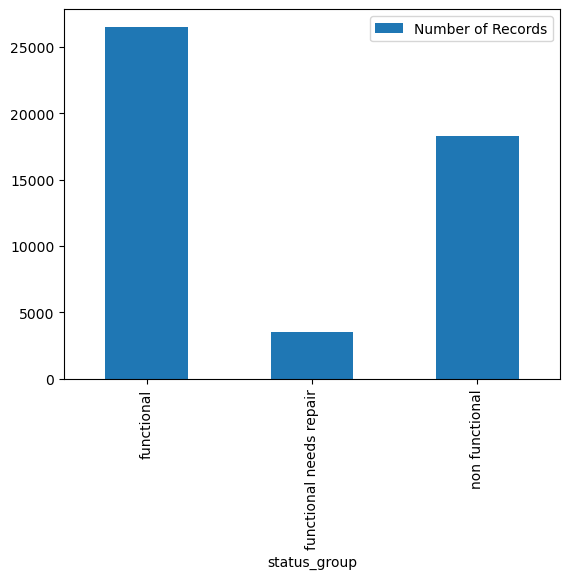

In [33]:
all_values_df.plot(kind='bar')

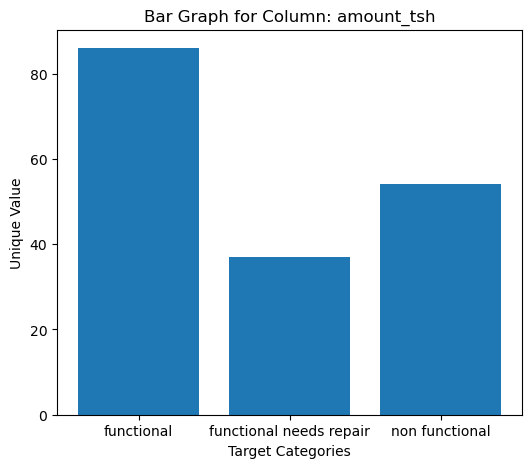

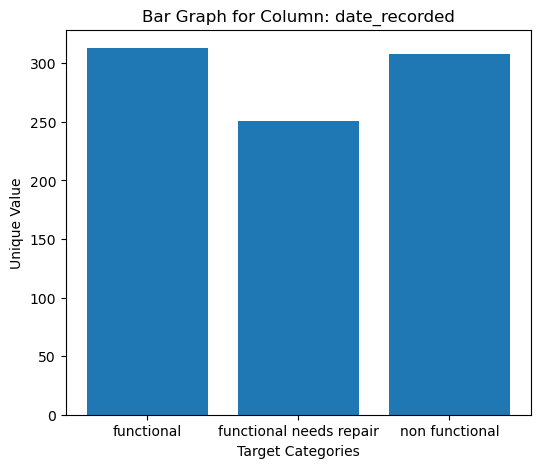

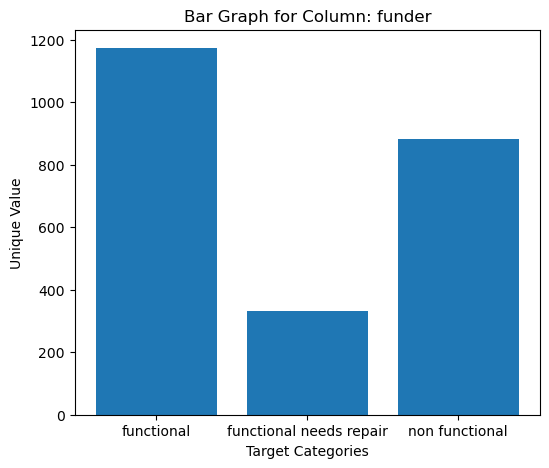

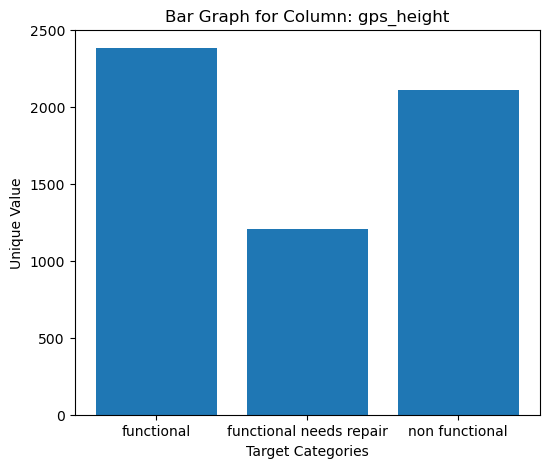

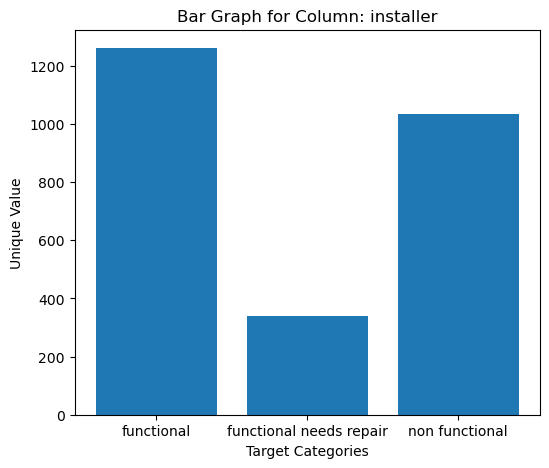

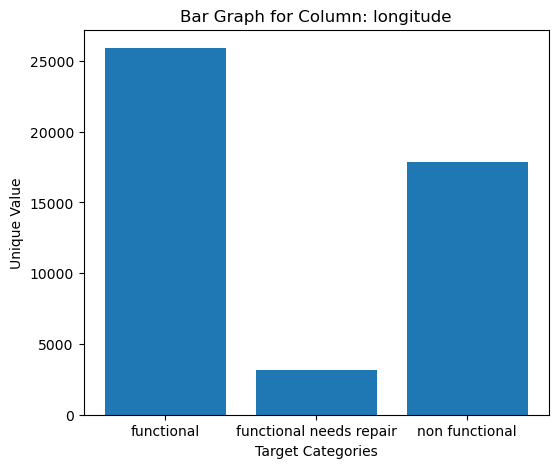

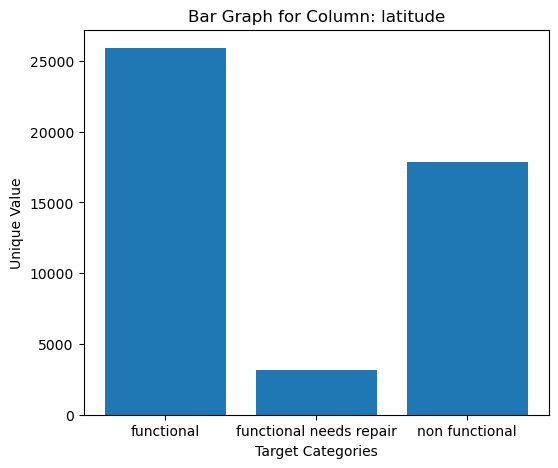

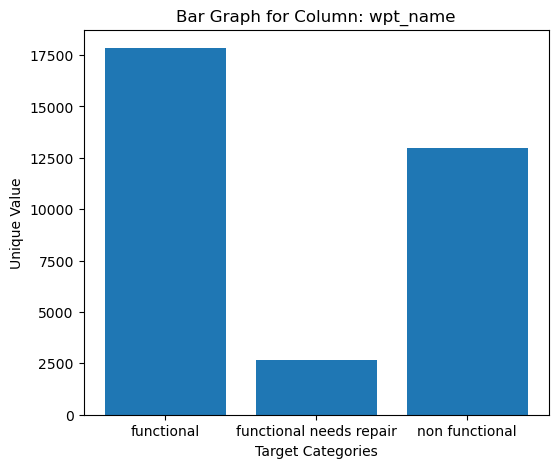

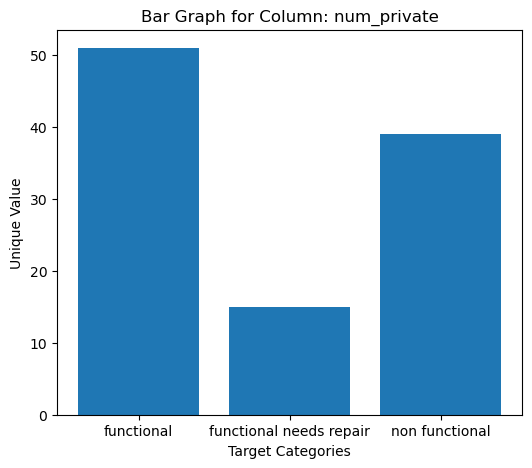

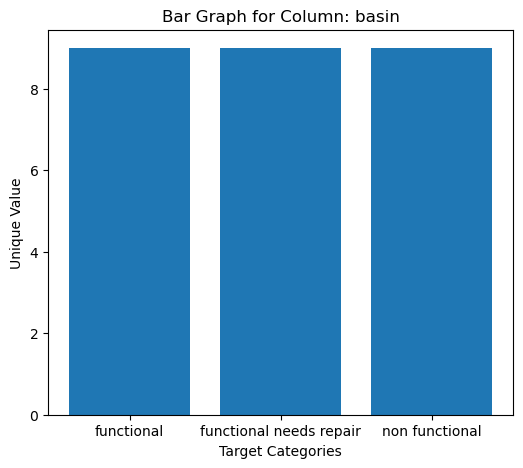

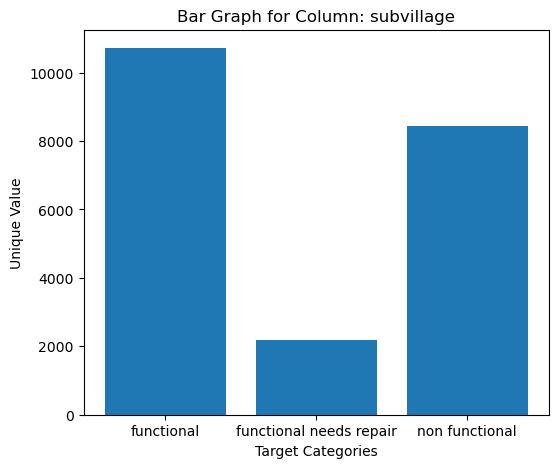

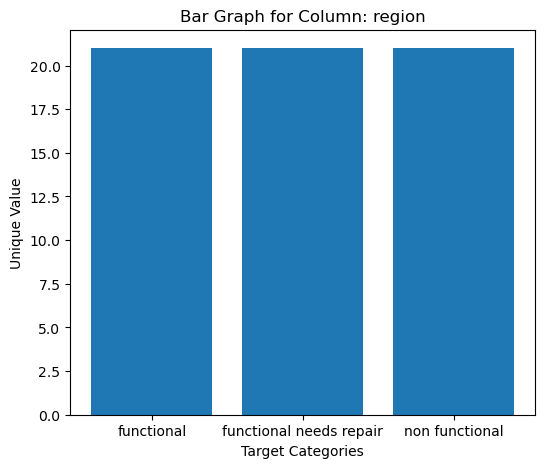

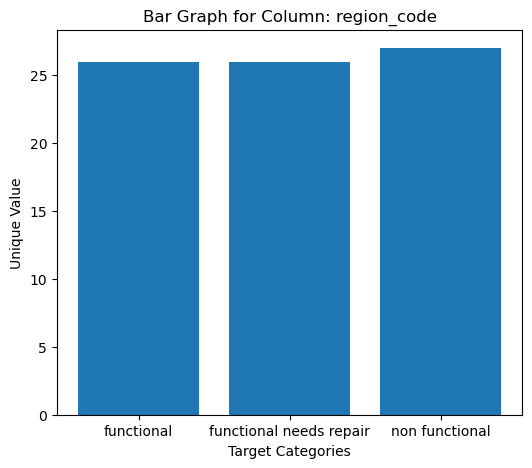

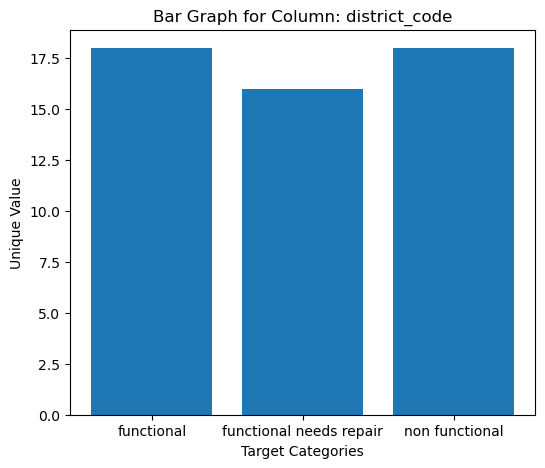

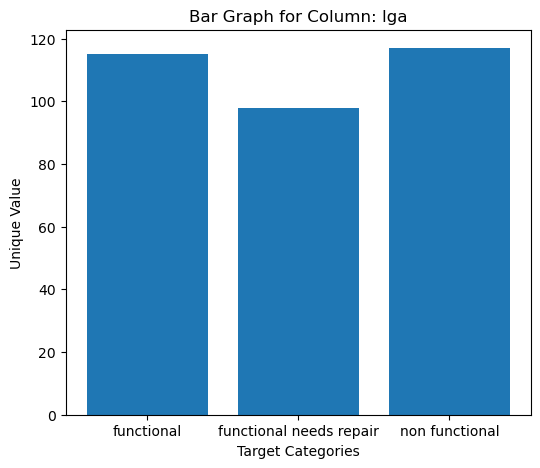

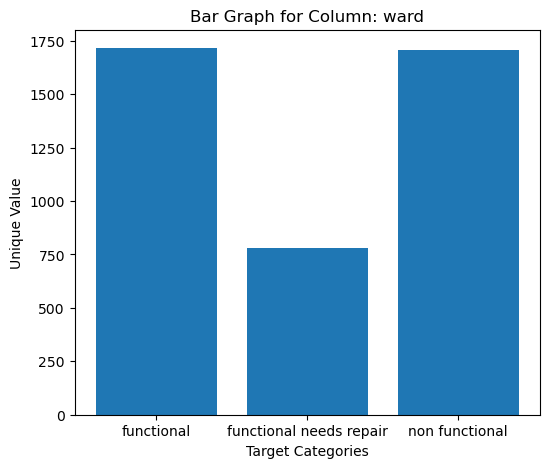

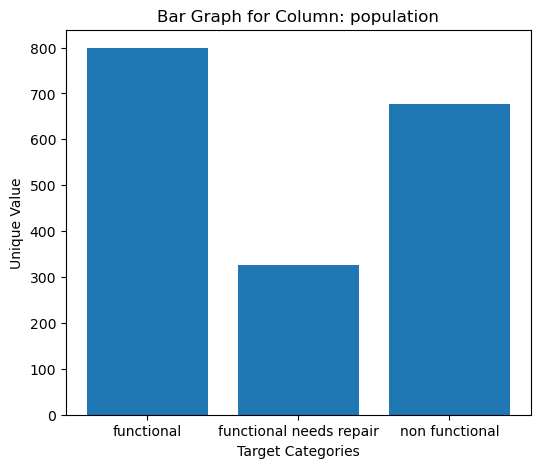

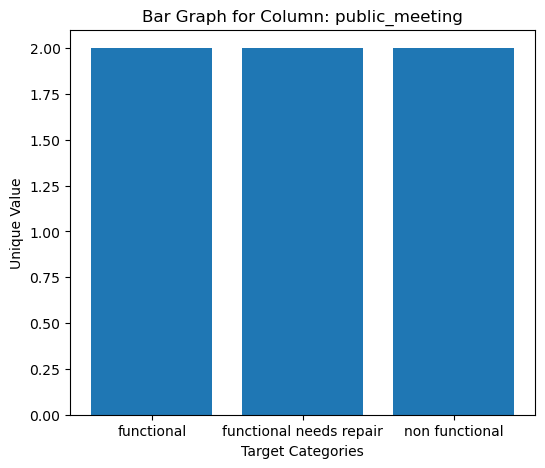

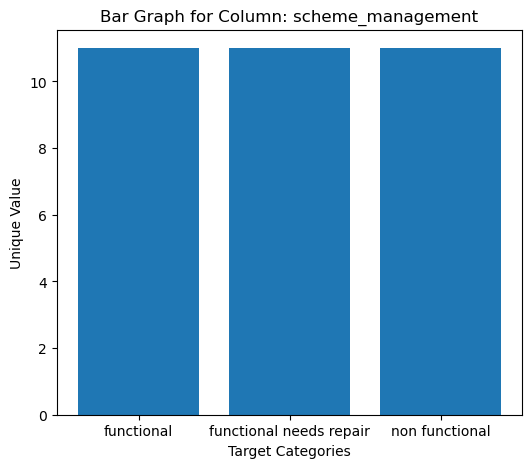

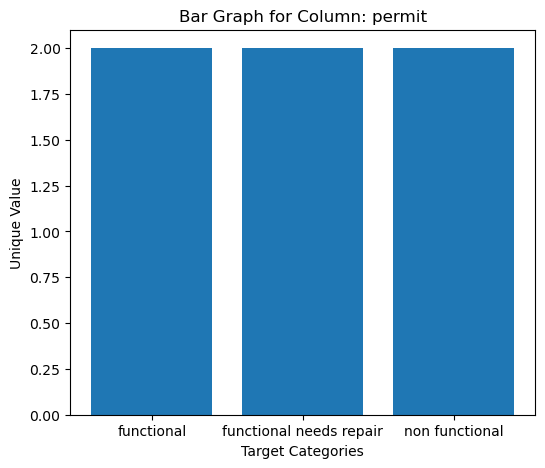

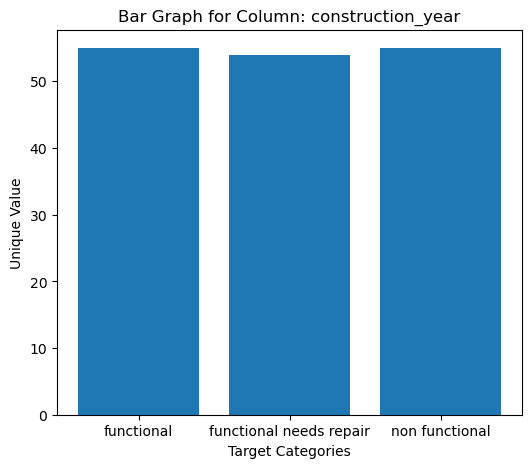

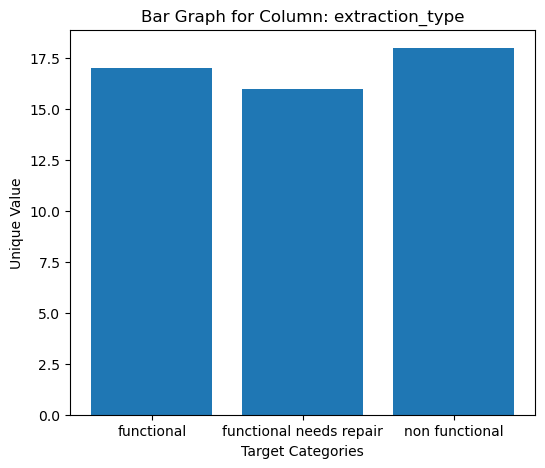

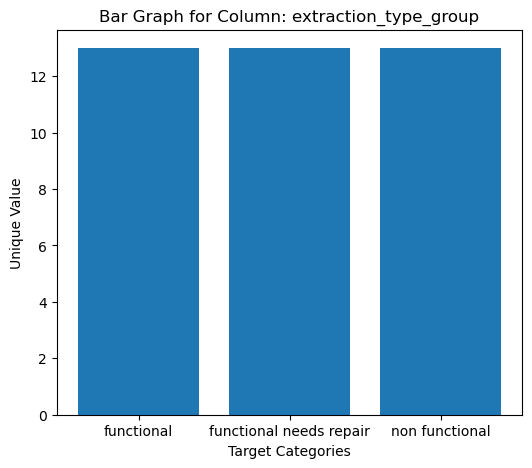

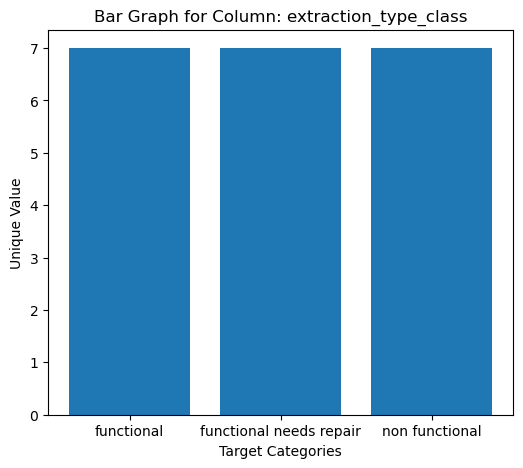

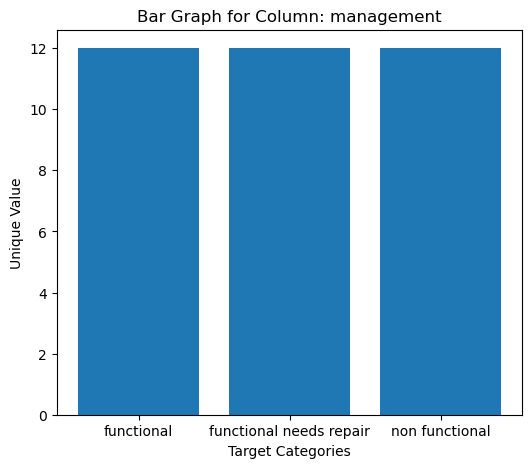

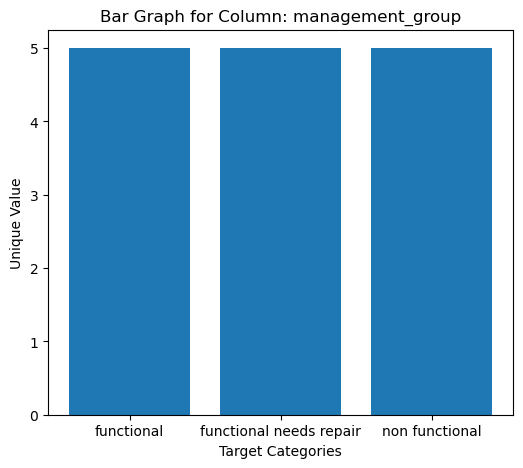

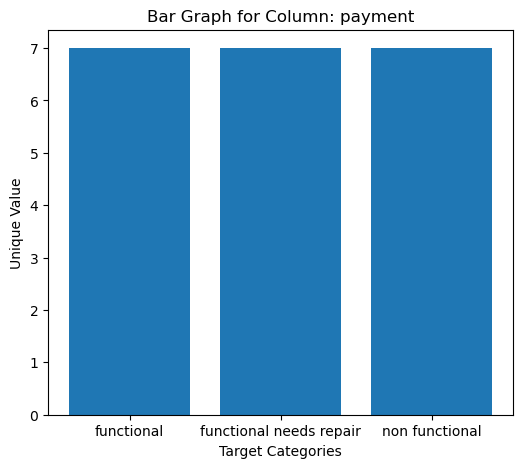

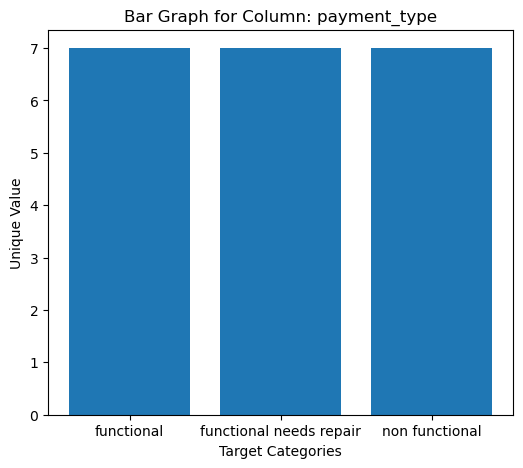

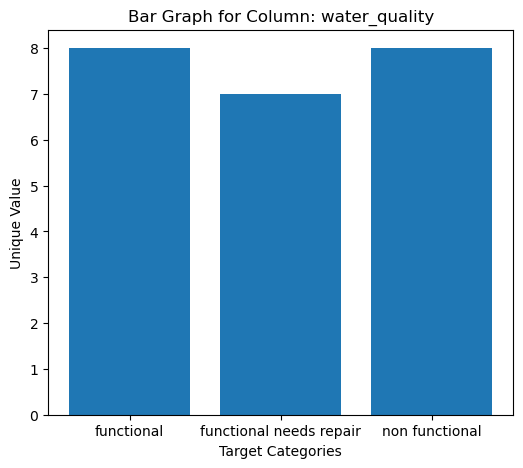

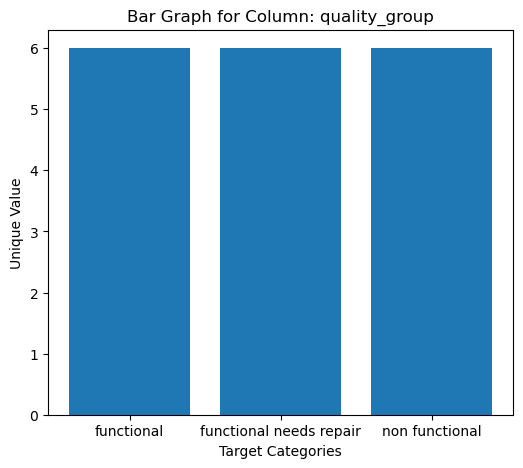

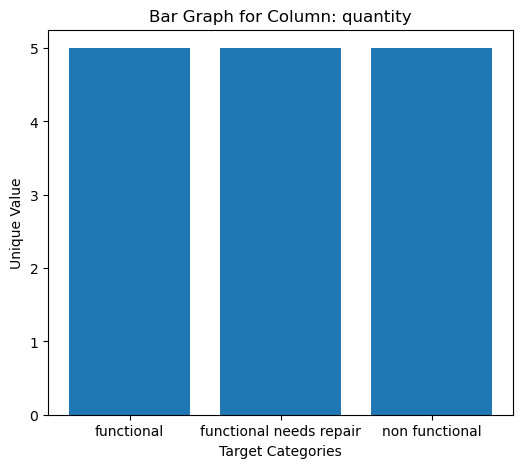

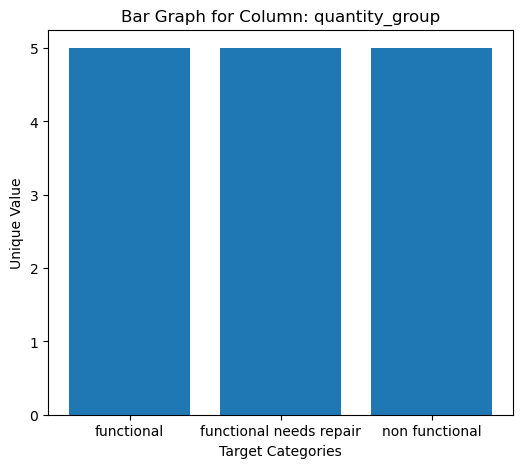

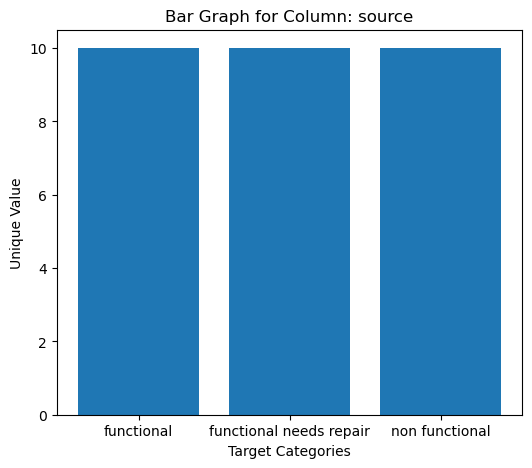

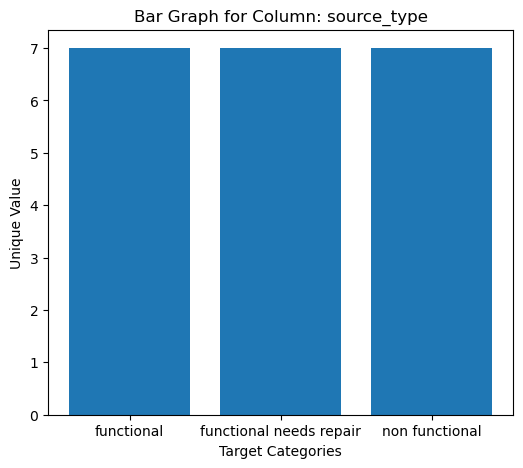

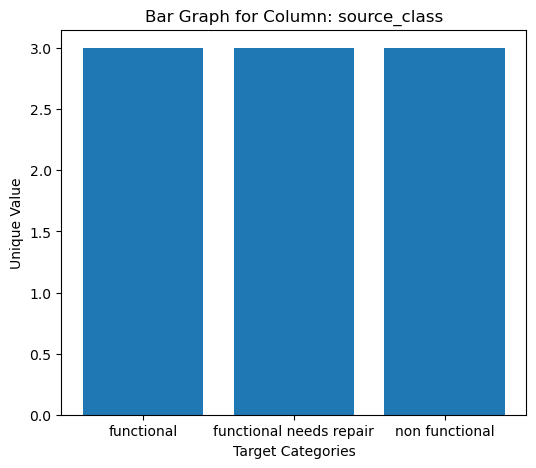

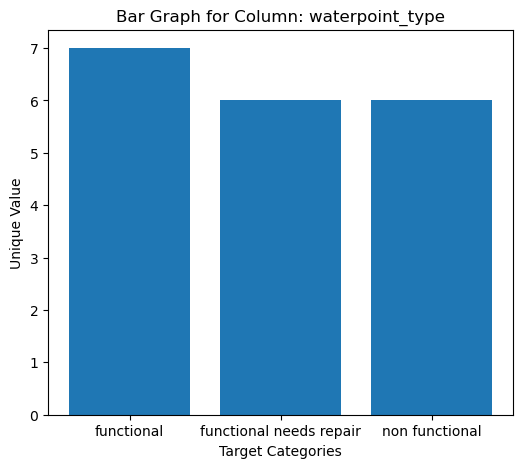

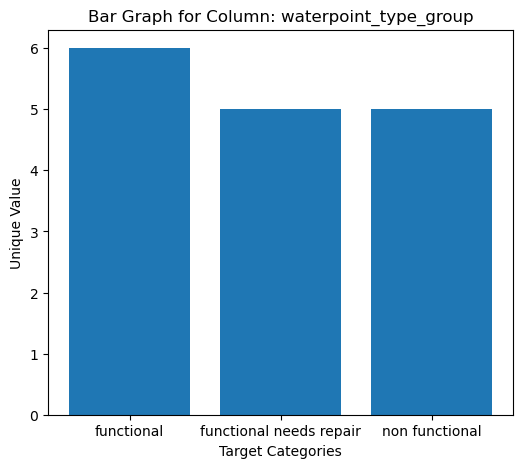

In [34]:
# Loop through each column
for column in unique_values_df.columns:
    # Get the values for the current column
    values = unique_values_df[column]
    
    # Create a bar graph for the current column
    plt.figure(figsize=(6, 5))  # Set the figure size
    plt.bar(values.index, values)  # Plot the bar graph
    plt.xlabel('Target Categories')  # Set the x-axis label
    plt.ylabel('Unique Value')  # Set the y-axis label
    plt.title(f'Bar Graph for Column: {column}')  # Set the title of the plot
    plt.show()  # Show the plot

In [35]:
merged_rows.describe().T # statistical data of numeric columns

count         mean          std       min        25%  \
amount_tsh         48285.0   360.438737  2828.523604   0.00000   0.000000   
gps_height         48285.0   701.506348   698.807672 -90.00000   0.000000   
longitude          48285.0    34.213658     6.329426   0.00000  33.039483   
latitude           48285.0    -5.700698     2.870812 -11.64944  -8.251577   
num_private        48285.0     0.552180    13.291614   0.00000   0.000000   
region_code        48285.0    14.794470    17.235856   1.00000   5.000000   
district_code      48285.0     5.754644     9.702270   0.00000   2.000000   
population         48285.0   176.693176   472.518308   0.00000   0.000000   
construction_year  48285.0  1342.775085   937.145933   0.00000   0.000000   

                           50%          75%           max  
amount_tsh            0.000000    50.000000  2.500000e+05  
gps_height          463.000000  1335.000000  2.770000e+03  
longitude            35.212322    37.355564  4.032340e+01  
latitude             -4.986797    -3.334880 -2.000000e-08  
num_private           0.000000     0.000000  1.776000e+03  
region_code          12.000000    17.000000  9.900000e+01  
district_code         3.000000     5.000000  8.000000e+01  
population           30.000000   200.000000  3.050000e+04  
construction_year  1987.000000  2005.000000  2.013000e+03

In [36]:
merged_rows

amount_tsh date_recorded               funder  gps_height  \
0          6000.0    2011-03-14                Roman        1390   
1            25.0    2013-02-25         Lottery Club         686   
2             0.0    2013-01-28               Unicef         263   
3            20.0    2011-03-13  Mkinga Distric Coun           0   
4             0.0    2012-10-01                 Dwsp           0   
...           ...           ...                  ...         ...   
48280       500.0    2011-03-09           World Bank         351   
48281        10.0    2013-05-03      Germany Republi        1210   
48282      4700.0    2011-05-07          Cefa-njombe        1212   
48283         0.0    2011-03-08                Malec           0   
48284         0.0    2011-03-23           World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1      World vision  37.460664  -3.821329           Kwa Mahundi            0   
2            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
3               DWE  39.172796  -4.765587                Tajiri            0   
4              DWSP  33.362410  -3.766365            Kwa Ngomho            0   
...             ...        ...        ...                   ...          ...   
48280      ML appro  37.634053  -6.124830            Chimeredya            0   
48281           CES  37.169807  -3.253847   Area Three Namba 27            0   
48282          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
48283          Musa  35.861315  -6.378573                Mshoro            0   
48284         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin     subvillage       region  region_code  \
0                   Lake Nyasa       Mnyusi B       Iringa           11   
1                      Pangani        Majengo      Manyara           21   
2      Ruvuma / Southern Coast     Mahakamani       Mtwara           90   
3                      Pangani    Moa/Mwereme        Tanga            4   
4                     Internal  Ishinabulandi    Shinyanga           17   
...                        ...            ...          ...          ...   
48280              Wami / Ruvu       Komstari     Morogoro            5   
48281                  Pangani       Kiduruni  Kilimanjaro            3   
48282                   Rufiji       Igumbilo       Iringa           11   
48283                   Rufiji         Mwinyi       Dodoma            1   
48284              Wami / Ruvu   Kikatanyemba     Morogoro            5   

       district_code              lga              ward  population  \
0                  5           Ludewa          Mundindi         109   
1                  4        Simanjiro           Ngorika         250   
2                 63         Nanyumbu          Nanyumbu          58   
3                  8           Mkinga               Moa           1   
4                  3  Shinyanga Rural            Samuye           0   
...              ...              ...               ...         ...   
48280              6          Mvomero          Diongoya          89   
48281              5              Hai  Masama Magharibi         125   
48282              4           Njombe            Ikondo          56   
48283              4         Chamwino      Mvumi Makulu           0   
48284              2   Morogoro Rural        Ngerengere         150   

      public_meeting scheme_management permit  construction_year  \
0               True               VWC  False               1999   
1               True               VWC   True               2009   
2               True               VWC   True               1986   
3               True               VWC   True               2009   
4               True               VWC   True                  0   
...              ...               ...    ...                ...   

In [37]:
merged_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             48285 non-null  float64
 1   date_recorded          48285 non-null  object 
 2   funder                 48285 non-null  object 
 3   gps_height             48285 non-null  int64  
 4   installer              48285 non-null  object 
 5   longitude              48285 non-null  float64
 6   latitude               48285 non-null  float64
 7   wpt_name               48285 non-null  object 
 8   num_private            48285 non-null  int64  
 9   basin                  48285 non-null  object 
 10  subvillage             48285 non-null  object 
 11  region                 48285 non-null  object 
 12  region_code            48285 non-null  int64  
 13  district_code          48285 non-null  int64  
 14  lga                    48285 non-null  object 
 15  wa

In [38]:
# Convert 'date_recorded' column to datetime format if it's not already in datetime format
merged_rows['date_recorded'] = pd.to_datetime(merged_rows['date_recorded'])

# Extract year, month, day, and weekday name
merged_rows['date_recorded_year'] = merged_rows['date_recorded'].dt.year
merged_rows['date_recorded_month'] = merged_rows['date_recorded'].dt.month
merged_rows['date_recorded_day'] = merged_rows['date_recorded'].dt.day
merged_rows['date_recorded_weekday'] = merged_rows['date_recorded'].dt.day_name()

# Dropping the "date_recorded" column
merged_rows.drop("date_recorded", axis=1, inplace=True)

# Display the DataFrame with extracted information
merged_rows[['date_recorded_year', 'date_recorded_month', 'date_recorded_day', 'date_recorded_weekday']]

date_recorded_year  date_recorded_month  date_recorded_day  \
0                    2011                    3                 14   
1                    2013                    2                 25   
2                    2013                    1                 28   
3                    2011                    3                 13   
4                    2012                   10                  1   
...                   ...                  ...                ...   
48280                2011                    3                  9   
48281                2013                    5                  3   
48282                2011                    5                  7   
48283                2011                    3                  8   
48284                2011                    3                 23   

      date_recorded_weekday  
0                    Monday  
1                    Monday  
2                    Monday  
3                    Sunday  
4                    Monday  
...                     ...  
48280             Wednesday  
48281                Friday  
48282              Saturday  
48283               Tuesday  
48284             Wednesday  

[48285 rows x 4 columns]

In [39]:
merged_rows[['date_recorded_year', 'date_recorded_month', 'date_recorded_day', 'date_recorded_weekday']].nunique().sort_values().to_frame("Unique Values")

Unique Values
date_recorded_year                 5
date_recorded_weekday              7
date_recorded_month               12
date_recorded_day                 31

In [40]:
merged_rows.shape

(48285, 41)

In [41]:
merged_rows.head(10)

amount_tsh                   funder  gps_height             installer  \
0      6000.0                    Roman        1390                 Roman   
1        25.0             Lottery Club         686          World vision   
2         0.0                   Unicef         263                UNICEF   
3        20.0      Mkinga Distric Coun           0                   DWE   
4         0.0                     Dwsp           0                  DWSP   
5         0.0                 Wateraid           0             Water Aid   
6         0.0                  Private          62               Private   
7       200.0                   Danida        1062                DANIDA   
8         0.0             World Vision           0          World vision   
9         0.0  Lawatefuka Water Supply        1368  Lawatefuka water sup   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  37.460664  -3.821329           Kwa Mahundi            0   
2  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
3  39.172796  -4.765587                Tajiri            0   
4  33.362410  -3.766365            Kwa Ngomho            0   
5  32.711100  -5.146712     Kwa Ramadhan Musa            0   
6  39.209518  -7.034139         Mzee Hokororo            0   
7  35.770258 -10.574175      Kwa Alid Nchimbi            0   
8  33.798106  -3.290194                 Pamba            0   
9  37.092574  -3.181783  Kwa John Izack Mmari            0   

                     basin     subvillage       region  region_code  \
0               Lake Nyasa       Mnyusi B       Iringa           11   
1                  Pangani        Majengo      Manyara           21   
2  Ruvuma / Southern Coast     Mahakamani       Mtwara           90   
3                  Pangani    Moa/Mwereme        Tanga            4   
4                 Internal  Ishinabulandi    Shinyanga           17   
5          Lake Tanganyika     Imalauduki       Tabora           14   
6              Wami / Ruvu         Mizugo        Pwani           60   
7               Lake Nyasa   Ngondombwito       Ruvuma           10   
8                 Internal        Nkilifa    Shinyanga           17   
9                  Pangani        Omarini  Kilimanjaro            3   

   district_code              lga            ward  population public_meeting  \
0              5           Ludewa        Mundindi         109           True   
1              4        Simanjiro         Ngorika         250           True   
2             63         Nanyumbu        Nanyumbu          58           True   
3              8           Mkinga             Moa           1           True   
4              3  Shinyanga Rural          Samuye           0           True   
5              6     Tabora Urban        Itetemia           0           True   
6             43         Mkuranga         Tambani         345           True   
7              5         Namtumbo          Msindo         250           True   
8              2            Maswa        Busilili           0           True   
9              7             Siha  Siha Kaskazini           1           True   

  scheme_management permit  construction_year extraction_type  \
0               VWC  False               1999         gravity   
1               VWC   True               2009         gravity   
2               VWC   True               1986     submersible   
3               VWC   True               2009     submersible   
4               VWC   True                  0          swn 80   
5               VWC   True                  0   india mark ii   
6  Private operator  False               2011     submersible   
7               WUG  False               1987          swn 80   
8               WUG  False                  0     nira/tanira   
9       Water Board   True               2009         gravity   

  extraction_type_group extraction_type_class        management  \
0               gravity              

In [42]:
merged_rows[['construction_year', 'date_recorded_year']]

construction_year  date_recorded_year
0                   1999                2011
1                   2009                2013
2                   1986                2013
3                   2009                2011
4                      0                2012
...                  ...                 ...
48280               2007                2011
48281               1999                2013
48282               1996                2011
48283                  0                2011
48284               2002                2011

[48285 rows x 2 columns]

In [43]:
merged_rows.construction_year.value_counts()

construction_year
0       15814
2008     2426
2009     2306
2010     2011
2007     1423
2006     1329
2000     1251
2003     1191
2011     1032
1978      997
2004      987
2002      954
2005      879
1999      877
2012      835
1998      789
1995      782
1985      767
1984      710
1982      695
1972      679
1974      621
1990      615
1994      595
1980      581
1996      571
1992      512
1988      491
1997      476
2001      476
1993      463
1983      457
1975      402
1986      391
1976      367
1970      297
1989      293
1991      278
1987      268
1981      217
1973      183
1979      161
1977      153
2013      134
1971      128
1963       83
1967       80
1968       57
1969       55
1960       39
1964       27
1962       27
1961       20
1965       17
1966       16
Name: count, dtype: int64

<Axes: xlabel='construction_year'>

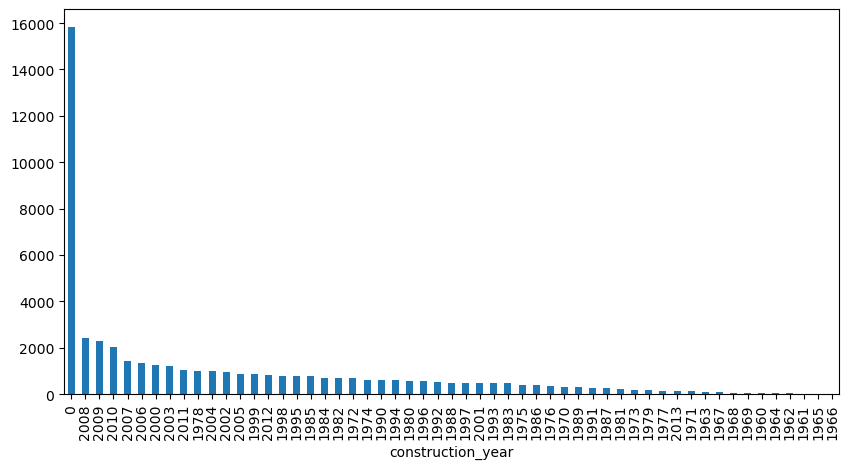

In [44]:
plt.figure(figsize=(10, 5))
merged_rows.construction_year.value_counts().plot(kind='bar')

In [45]:
merged_rows.date_recorded_year.value_counts()

date_recorded_year
2011    23999
2013    19483
2012     4782
2004       20
2002        1
Name: count, dtype: int64

<Axes: xlabel='date_recorded_year'>

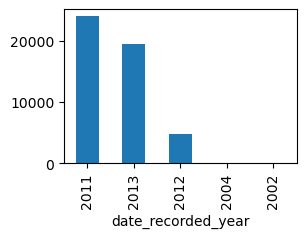

In [46]:
plt.figure(figsize=(3, 2))
merged_rows.date_recorded_year.value_counts().plot(kind='bar')

In [47]:
merged_rows.nunique().sort_values().to_frame("Unique Values")

Unique Values
permit                             2
public_meeting                     2
status_group                       3
source_class                       3
quantity                           5
management_group                   5
date_recorded_year                 5
quantity_group                     5
waterpoint_type_group              6
quality_group                      6
payment                            7
payment_type                       7
date_recorded_weekday              7
source_type                        7
waterpoint_type                    7
extraction_type_class              7
water_quality                      8
basin                              9
source                            10
scheme_management                 11
date_recorded_month               12
management                        12
extraction_type_group             13
extraction_type                   18
district_code                     18
region                            21
region_code                       27
date_recorded_day                 31
construction_year                 55
num_private                       58
amount_tsh                        91
lga                              117
population                       991
funder                          1586
installer                       1787
ward                            1862
gps_height                      2426
subvillage                     16183
wpt_name                       31029
longitude                      46913
latitude                       46915

In [48]:
merged_rows.dtypes.value_counts().sort_values().to_frame("Data Type Counts")

Data Type Counts
float64                 3
int32                   3
int64                   6
object                 29

In [81]:
merged_rows.dtypes.sort_values().to_frame("Data Type Column List")

Data Type Column List
permit                                int32
extraction_type_class                 int32
management                            int32
management_group                      int32
payment                               int32
payment_type                          int32
water_quality                         int32
extraction_type                       int32
quality_group                         int32
source                                int32
source_class                          int32
waterpoint_type                       int32
status_group                          int32
date_recorded_year                    int32
date_recorded_month                   int32
quantity                              int32
date_recorded_day                     int32
date_recorded_weekday                 int32
public_meeting                        int32
funder                                int32
installer                             int32
wpt_name                              int32
scheme_management                     int32
subvillage                            int32
region                                int32
basin                                 int32
lga                                   int32
ward                                  int32
district_code                         int64
num_private                           int64
population                            int64
gps_height                            int64
construction_year                     int64
region_code                           int64
latitude                            float64
longitude                           float64
amount_tsh                          float64

In [50]:
# Exclude object datatype columns
numeric_cols = merged_rows.select_dtypes(include=['number']).columns
numeric_data = merged_rows[numeric_cols]

# Compute correlation matrix
correlation_matrix = numeric_data.corr()
correlation_matrix

amount_tsh  gps_height  longitude  latitude  num_private  \
amount_tsh             1.000000    0.089279   0.022989 -0.069824     0.002041   
gps_height             0.089279    1.000000   0.142971 -0.116661     0.005783   
longitude              0.022989    0.142971   1.000000 -0.413749     0.026135   
latitude              -0.069824   -0.116661  -0.413749  1.000000     0.010415   
num_private            0.002041    0.005783   0.026135  0.010415     1.000000   
region_code           -0.031757   -0.189449   0.016745 -0.243385    -0.024751   
district_code         -0.035379   -0.173971   0.140967 -0.184219    -0.007113   
population             0.015775    0.112381   0.074198 -0.050228     0.005005   
construction_year      0.078808    0.648171   0.401173 -0.303323     0.026756   
date_recorded_year    -0.008835    0.297499   0.019718  0.150630    -0.016418   
date_recorded_month   -0.040529   -0.318922  -0.214440  0.319254    -0.022766   
date_recorded_day      0.006980   -0.031908  -0.037924 -0.031667     0.007682   

                     region_code  district_code  population  \
amount_tsh             -0.031757      -0.035379    0.015775   
gps_height             -0.189449      -0.173971    0.112381   
longitude               0.016745       0.140967    0.074198   
latitude               -0.243385      -0.184219   -0.050228   
num_private            -0.024751      -0.007113    0.005005   
region_code             1.000000       0.706636    0.085266   
district_code           0.706636       1.000000    0.068134   
population              0.085266       0.068134    1.000000   
construction_year       0.015949       0.060507    0.245464   
date_recorded_year      0.143046       0.016897    0.133154   
date_recorded_month    -0.093244      -0.092701   -0.169849   
date_recorded_day       0.070412       0.052412    0.027825   

                     construction_year  date_recorded_year  \
amount_tsh                    0.078808           -0.008835   
gps_height                    0.648171            0.297499   
longitude                     0.401173            0.019718   
latitude                     -0.303323            0.150630   
num_private                   0.026756           -0.016418   
region_code                   0.015949            0.143046   
district_code                 0.060507            0.016897   
population                    0.245464            0.133154   
construction_year             1.000000            0.329433   
date_recorded_year            0.329433            1.000000   
date_recorded_month          -0.546721           -0.291325   
date_recorded_day            -0.009128            0.001902   

                     date_recorded_month  date_recorded_day  
amount_tsh                     -0.040529           0.006980  
gps_height                     -0.318922          -0.031908  
longitude                      -0.214440          -0.037924  
latitude                        0.319254          -0.031667  
num_private                    -0.022766           0.007682  
region_code                    -0.093244           0.070412  
district_code                  -0.092701           0.052412  
population                     -0.169849           0.027825  
construction_year              -0.546721          -0.009128  
date_recorded_year             -0.291325           0.001902  
date_recorded_month             1.000000          -0.216175  
date_recorded_day              -0.216175           1.000000

In [51]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create Plotly heatmap with annotations
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1,  # Set color scale limits from -1 to 1 for correlation
    colorbar=dict(title='Correlation'),
    text=correlation_matrix.applymap(lambda x: f'{x:.2f}').values  # Format annotations with 2 decimal places
)

layout = go.Layout(
    title='Correlation Heatmap with Annotations',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

fig = go.Figure(data=[heatmap], layout=layout)
pyo.iplot(fig)

In [52]:
merged_rows

amount_tsh               funder  gps_height     installer  longitude  \
0          6000.0                Roman        1390         Roman  34.938093   
1            25.0         Lottery Club         686  World vision  37.460664   
2             0.0               Unicef         263        UNICEF  38.486161   
3            20.0  Mkinga Distric Coun           0           DWE  39.172796   
4             0.0                 Dwsp           0          DWSP  33.362410   
...           ...                  ...         ...           ...        ...   
48280       500.0           World Bank         351      ML appro  37.634053   
48281        10.0      Germany Republi        1210           CES  37.169807   
48282      4700.0          Cefa-njombe        1212          Cefa  35.249991   
48283         0.0                Malec           0          Musa  35.861315   
48284         0.0           World Bank         191         World  38.104048   

        latitude              wpt_name  num_private                    basin  \
0      -9.856322                  none            0               Lake Nyasa   
1      -3.821329           Kwa Mahundi            0                  Pangani   
2     -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast   
3      -4.765587                Tajiri            0                  Pangani   
4      -3.766365            Kwa Ngomho            0                 Internal   
...          ...                   ...          ...                      ...   
48280  -6.124830            Chimeredya            0              Wami / Ruvu   
48281  -3.253847   Area Three Namba 27            0                  Pangani   
48282  -9.070629     Kwa Yahona Kuvala            0                   Rufiji   
48283  -6.378573                Mshoro            0                   Rufiji   
48284  -6.747464       Kwa Mzee Lugawa            0              Wami / Ruvu   

          subvillage       region  region_code  district_code  \
0           Mnyusi B       Iringa           11              5   
1            Majengo      Manyara           21              4   
2         Mahakamani       Mtwara           90             63   
3        Moa/Mwereme        Tanga            4              8   
4      Ishinabulandi    Shinyanga           17              3   
...              ...          ...          ...            ...   
48280       Komstari     Morogoro            5              6   
48281       Kiduruni  Kilimanjaro            3              5   
48282       Igumbilo       Iringa           11              4   
48283         Mwinyi       Dodoma            1              4   
48284   Kikatanyemba     Morogoro            5              2   

                   lga              ward  population public_meeting  \
0               Ludewa          Mundindi         109           True   
1            Simanjiro           Ngorika         250           True   
2             Nanyumbu          Nanyumbu          58           True   
3               Mkinga               Moa           1           True   
4      Shinyanga Rural            Samuye           0           True   
...                ...               ...         ...            ...   
48280          Mvomero          Diongoya          89           True   
48281              Hai  Masama Magharibi         125           True   
48282           Njombe            Ikondo          56           True   
48283         Chamwino      Mvumi Makulu           0           True   
48284   Morogoro Rural        Ngerengere         150           True   

      scheme_management permit  construction_year extraction_type  \
0                   VWC  False               1999         gravity   
1                   VWC   True               2009         gravity   
2                   VWC   True               1986     submersible   
3                   VWC   True               2009     submersible   
4                   VWC   True                  0          swn 80   
...                 ...    ...                ...

In [53]:
from sklearn.preprocessing import LabelEncoder

# Identify object datatype columns
object_cols = merged_rows.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    merged_rows[col] = le.fit_transform(merged_rows[col])
    label_encoders[col] = le

# Print label encodings for reference
for col, le in label_encoders.items():
    print(f"Label Encoder for column '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

Label Encoder for column 'funder': {'0': 0, 'A/co Germany': 1, 'Aar': 2, 'Abas Ka': 3, 'Abasia': 4, 'Abc-ihushi Development Cent': 5, 'Abd': 6, 'Abdul': 7, 'Abood': 8, 'Abs': 9, 'Aco/germany': 10, 'Acord': 11, 'Acra': 12, 'Action Aid': 13, 'Action Contre La Faim': 14, 'Adap': 15, 'Adb': 16, 'Adf': 17, 'Adp': 18, 'Adp Bungu': 19, 'Adp Mombo': 20, 'Adp/w': 21, 'Adra': 22, 'Af': 23, 'Afdp': 24, 'Africa': 25, 'Africa 2000 Network/undp': 26, 'Africa Amini Alama': 27, 'Africa Project Ev Germany': 28, 'African': 29, 'African 2000 Network': 30, 'African Barrick Gold': 31, 'African Development Bank': 32, 'African Development Foundation': 33, 'African Muslim Agency': 34, 'African Realief Committe Of Ku': 35, 'African Reflections Foundation': 36, 'African Relie': 37, 'Africaone Ltd': 38, 'Africare': 39, 'Afriican Reli': 40, 'Afya Department Lindi Rural': 41, 'Agt Church': 42, 'Ahmadia': 43, 'Ai': 44, 'Aic': 45, 'Aic Church': 46, 'Aict': 47, 'Aimgold': 48, 'Aixos': 49, 'Alia': 50, 'Ambwene Mwaikek

In [54]:
merged_rows

amount_tsh  funder  gps_height  installer  longitude   latitude  \
0          6000.0    1131        1390       1254  34.938093  -9.856322   
1            25.0     696         686       1713  37.460664  -3.821329   
2             0.0    1449         263       1540  38.486161 -11.155298   
3            20.0     818           0        322  39.172796  -4.765587   
4             0.0     288           0        333  33.362410  -3.766365   
...           ...     ...         ...        ...        ...        ...   
48280       500.0    1558         351        864  37.634053  -6.124830   
48281        10.0     372        1210        163  37.169807  -3.253847   
48282      4700.0     140        1212        217  35.249991  -9.070629   
48283         0.0     739           0       1006  35.861315  -6.378573   
48284         0.0    1558         191       1705  38.104048  -6.747464   

       wpt_name  num_private  basin  subvillage  region  region_code  \
0         31028            0      1        9941       3           11   
1         12745            0      5        7638       8           21   
2         30930            0      7        7562      12           90   
3         29951            0      5        9945      20            4   
4         17319            0      0        3165      17           17   
...         ...          ...    ...         ...     ...          ...   
48280      1571            0      8        5898      11            5   
48281       462            0      5        4736       6            3   
48282     20402            0      6        2495       3           11   
48283     24585            0      6       11780       2            1   
48284     16043            0      8        4914      11            5   

       district_code  lga  ward  population  public_meeting  \
0                  5   47  1270         109               1   
1                  4  100  1455         250               1   
2                 63   80  1408          58               1   
3                  8   62  1180           1               1   
4                  3   96  1650           0               1   
...              ...  ...   ...         ...             ...   
48280              6   76   191          89               1   
48281              5   14   967         125               1   
48282              4   84   310          56               1   
48283              4    9  1290           0               1   
48284              2   64  1444         150               1   

       scheme_management  permit  construction_year  extraction_type  \
0                      6       0               1999                3   
1                      6       1               2009                3   
2                      6       1               1986               14   
3                      6       1               2009               14   
4                      6       1                  0               15   
...                  ...     ...                ...              ...   
48280                  6       1               2007               14   
48281                  9       1               1999                3   
48282                  6       1               1996                3   
48283                  6       1                  0                8   
48284                  6       1               2002                8   

       extraction_type_group  extraction_type_class  management  \
0                          1                      0           7   
1                          1                      0           7   
2                         10                      5           7   
3                         10                      5           7   
4                         11                      1           7   
...                      ...                    ...         ...   
48280                     10                      5           7   
48281                      1                      0           9   
48282                      1

In [55]:
merged_rows.corr()

amount_tsh    funder  gps_height  installer  longitude  \
amount_tsh               1.000000  0.006020    0.089279   0.013931   0.022989   
funder                   0.006020  1.000000   -0.003145   0.537209  -0.048022   
gps_height               0.089279 -0.003145    1.000000  -0.012442   0.142971   
installer                0.013931  0.537209   -0.012442   1.000000  -0.003775   
longitude                0.022989 -0.048022    0.142971  -0.003775   1.000000   
latitude                -0.069824  0.043549   -0.116661   0.030705  -0.413749   
wpt_name                 0.016407 -0.004508    0.069739   0.005218   0.004231   
num_private              0.002041  0.013163    0.005783   0.016972   0.026135   
basin                    0.016395 -0.096262   -0.124938  -0.037338   0.236876   
subvillage              -0.001049 -0.021075    0.003643  -0.022134   0.009210   
region                  -0.024718  0.136106   -0.396275   0.138120  -0.106157   
region_code             -0.031757  0.000502   -0.189449   0.050153   0.016745   
district_code           -0.035379 -0.024392   -0.173971   0.020235   0.140967   
lga                      0.012522  0.023292    0.073981   0.095307   0.236164   
ward                    -0.003038  0.018853    0.024627   0.008631   0.054919   
population               0.015775  0.010928    0.112381   0.022760   0.074198   
public_meeting           0.019413 -0.014275    0.075374  -0.029115   0.036510   
scheme_management       -0.007764  0.004035    0.047499   0.020621  -0.096852   
permit                   0.033187 -0.035473    0.078849   0.017005   0.082885   
construction_year        0.078808 -0.051717    0.648171  -0.015815   0.401173   
extraction_type         -0.032020 -0.001027   -0.278626   0.027251  -0.030618   
extraction_type_group   -0.022451  0.014536   -0.307330   0.055646  -0.021077   
extraction_type_class   -0.017757  0.043813   -0.291156   0.095815   0.037469   
management              -0.011304  0.049784   -0.015438  -0.007633  -0.156749   
management_group        -0.005048 -0.053330    0.038199  -0.076592  -0.079101   
payment                  0.025497  0.026725    0.134029   0.000558   0.074369   
payment_type            -0.140041  0.033495   -0.122463   0.025962   0.048326   
water_quality            0.012434 -0.020899    0.120044  -0.011259  -0.062648   
quality_group           -0.023170  0.001808   -0.150735   0.005695  -0.052768   
quantity                -0.014753  0.022306   -0.019588   0.021516   0.026422   
quantity_group          -0.014753  0.022306   -0.019588   0.021516   0.026422   
source                   0.005221 -0.104296    0.169658  -0.123977   0.021146   
source_type              0.003609 -0.112319    0.173313  -0.118290  -0.016729   
source_class             0.044725  0.030086    0.051964   0.036496   0.016555   
waterpoint_type         -0.049616  0.067322   -0.279497   0.066963  -0.164852   
waterpoint_type_group   -0.047101  0.047371   -0.253236   0.050179  -0.144075   
status_group            -0.061375 -0.057718   -0.148791  -0.038829  -0.004787   
date_recorded_year      -0.008835  0.010732    0.297499   0.032447   0.019718   
date_recorded_month     -0.040529  0.066466   -0.318922   0.024050  -0.214440   
date_recorded_day        0.006980  0.012513   -0.031908  -0.007824  -0.037924   
date_recorded_weekday    0.000439 -0.004600    0.021911   0.024667   0.011630   

                       latitude  wpt_name  num_private     basin  subvillage  \
amount_tsh            -0.069824  0.016407     0.002041  0.016395   -0.001049   
funder                 0.043549 -0.004508     0.013163 -0.096262   -0.021075   
gps_height            -0.116661  0.069739     0.005783 -0.124938    0.003643   
installer              0.030705  0.005218     0.016972 -0.037338   -0.022134   
longitude             -0.413749  0.004231     0.026135  0.236876    0.009210   
latitude               1.000000 -0.095903     0.010415 -0.239765   -0.005950   
wpt_name              -0.095903  1.000000     0.004411 -0.02

In [56]:
# Create Plotly heatmap with annotations
heatmap = go.Heatmap(
    z=merged_rows.corr().values,
    x=merged_rows.corr().columns,
    y=merged_rows.corr().columns,
    colorscale='RdBu',
    zmin=-1, zmax=1,  # Set color scale limits from -1 to 1 for correlation
    colorbar=dict(title='Correlation'),
    text=merged_rows.corr().applymap(lambda x: f'{x:.2f}').values  # Format annotations with 2 decimal places
)

layout = go.Layout(
    title='Correlation Heatmap with Annotations',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

fig = go.Figure(data=[heatmap], layout=layout)
pyo.iplot(fig)

### Observations on the correlation heatmap where below feature columns were highly correlated with each other:
- Need to drop 1 column from below pair
1. extraction_type
2. extraction_type_group
- Need to drop 1 column from below pair
1. quantity
2. quantity_group
- Need to drop 1 column from below pair
1. source
2. source_type
- Need to drop 1 column from below pair
1. waterpoint_type
2. waterpoint_type_group

In [57]:
# Dropping feature columns that are highly correlated with the other existing feature columns
merged_rows.drop(['extraction_type_group', 'quantity_group', 'source_type', 'waterpoint_type_group'], axis=1, inplace=True)

In [58]:
merged_rows.status_group.value_counts()

status_group
0    26516
2    18271
1     3498
Name: count, dtype: int64

Will need to fix the class imbalance issue which is present in the target label column so planning to upsample using the `SMOTE` function.

# Splitting feature and label columns in X and y

In [59]:
X = merged_rows.drop('status_group', axis=1)
y = merged_rows['status_group']

In [60]:
y.value_counts()

status_group
0    26516
2    18271
1     3498
Name: count, dtype: int64

In [61]:
# Resolving the class imbalance issue
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [62]:
y.value_counts()

status_group
0    26516
2    26516
1    26516
Name: count, dtype: int64

# Train Test split for model building

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Importance
Features                         
quantity                    0.089
longitude                   0.079
latitude                    0.066
wpt_name                    0.047
extraction_type_class       0.044
waterpoint_type             0.040
gps_height                  0.039
subvillage                  0.039
construction_year           0.037
lga                         0.034
funder                      0.032
ward                        0.032
source                      0.032
installer                   0.029
extraction_type             0.028
population                  0.028
date_recorded_day           0.027
amount_tsh                  0.025
payment                     0.025
region                      0.025
payment_type                0.023
region_code                 0.022
date_recorded_month         0.020
date_recorded_weekday       0.020
district_code               0.020
basin                       0.016
management                  0.015
scheme_management           0.015
source_class                0.011
permit                      0.010
management_group            0.006
public_meeting              0.006
date_recorded_year          0.006
water_quality               0.005
quality_group               0.005
num_private                 0.001

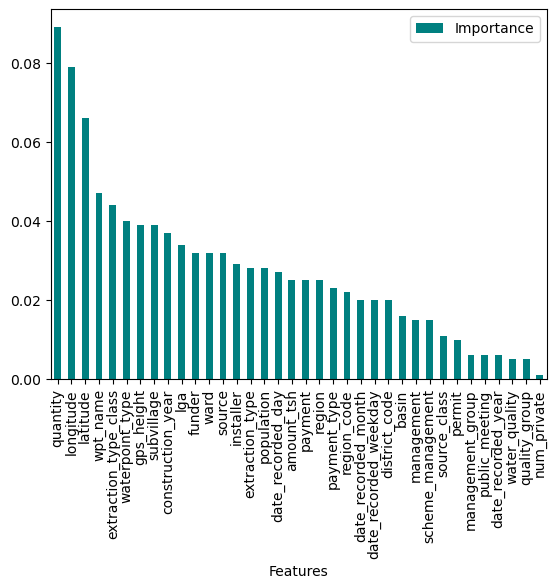

In [64]:
# Feature importance bar graph
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

# Machine Learning Model for Classification with Evaluation Metrics

In [65]:
# Classification Model Function

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [66]:
# Dummy Classifier [Baseline Classifier]

model = DummyClassifier(strategy="stratified")
classify(model, X, y)

Accuracy Score: 33.51938452255242

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.34      0.34      6568
           1       0.34      0.34      0.34      6639
           2       0.33      0.33      0.33      6680

    accuracy                           0.34     19887
   macro avg       0.34      0.34      0.34     19887
weighted avg       0.34      0.34      0.34     19887

Cross Validation Score: 33.222708317604145

Accuracy Score - Cross Validation Score is 0.29667620494827673


In [67]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, y)

Accuracy Score: 41.94700055312516

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.43      0.41      6568
           1       0.43      0.32      0.37      6639
           2       0.43      0.51      0.47      6680

    accuracy                           0.42     19887
   macro avg       0.42      0.42      0.42     19887
weighted avg       0.42      0.42      0.42     19887

Cross Validation Score: 41.64531696399134

Accuracy Score - Cross Validation Score is 0.3016835891338161


In [68]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, y)

Accuracy Score: 38.84949967315332

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.07      0.13      6568
           1       0.96      0.10      0.18      6639
           2       0.35      0.99      0.52      6680

    accuracy                           0.39     19887
   macro avg       0.72      0.39      0.28     19887
weighted avg       0.72      0.39      0.28     19887

Cross Validation Score: 38.766527759883864

Accuracy Score - Cross Validation Score is 0.08297191326945352


In [69]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=42, max_depth=15)
classify(model, X, y)

Accuracy Score: 78.85553376577664

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      6568
           1       0.82      0.84      0.83      6639
           2       0.82      0.70      0.75      6680

    accuracy                           0.79     19887
   macro avg       0.79      0.79      0.79     19887
weighted avg       0.79      0.79      0.79     19887

Cross Validation Score: 77.96929954262575

Accuracy Score - Cross Validation Score is 0.8862342231508933


In [70]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=42)
classify(model, X, y)

Accuracy Score: 83.5470407804093

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      6568
           1       0.85      0.91      0.88      6639
           2       0.88      0.73      0.80      6680

    accuracy                           0.84     19887
   macro avg       0.84      0.84      0.83     19887
weighted avg       0.84      0.84      0.83     19887

Cross Validation Score: 82.29372990688437

Accuracy Score - Cross Validation Score is 1.2533108735249385


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K Neighbors Classifier

model=KNeighborsClassifier()
classify(model, X_scaled, y)

Accuracy Score: 79.59471011213355

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      6568
           1       0.81      0.92      0.86      6639
           2       0.83      0.69      0.75      6680

    accuracy                           0.80     19887
   macro avg       0.80      0.80      0.79     19887
weighted avg       0.80      0.80      0.79     19887

Cross Validation Score: 79.82226663994334

Accuracy Score - Cross Validation Score is -0.22755652780978153


In [74]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, y)

Accuracy Score: 85.48297883039172

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      6568
           1       0.88      0.93      0.90      6639
           2       0.86      0.80      0.83      6680

    accuracy                           0.85     19887
   macro avg       0.85      0.85      0.85     19887
weighted avg       0.85      0.85      0.85     19887

Cross Validation Score: 84.22213880730123

Accuracy Score - Cross Validation Score is 1.2608400230904806


In [75]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, y)

Accuracy Score: 84.05491024287223

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      6568
           1       0.87      0.90      0.88      6639
           2       0.86      0.76      0.81      6680

    accuracy                           0.84     19887
   macro avg       0.84      0.84      0.84     19887
weighted avg       0.84      0.84      0.84     19887

Cross Validation Score: 82.76139817683217

Accuracy Score - Cross Validation Score is 1.2935120660400514


In [76]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3144
[LightGBM] [Info] Number of data points in the train set: 59661, number of used features: 36
[LightGBM] [Info] Start training from score -1.095550
[LightGBM] [Info] Start training from score -1.099115
[LightGBM] [Info] Start training from score -1.101180
Accuracy Score: 81.28928445718309

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      6568
           1       0.85      0.87      0.86      6639
           2       0.84      0.72      0.77      6680

    accuracy                           0.81     19887
   macro avg       0.82      0.81      0.81     19887
weighted avg       0.82      0.81      0.81     19887

[LightGBM] [Info] Auto-choosing col-wise mult

# Hyper parameter tuning on the best Classification ML Model

In [79]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 350, 400],
              'min_samples_split' : [3, 4, 5],
              'random_state' : [21, 42, 111]
             }

GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [300, 350, 400],
                         'random_state': [21, 42, 111]})

In [82]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 4,
 'n_estimators': 400,
 'random_state': 111}

In [83]:
GSCV.best_score_

0.8551650068003163

In [84]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, min_samples_split=4, 
                                   n_estimators=400, random_state=111)
Classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.84502438779103


# Saving the model

In [86]:
import joblib

filename = "FinalModel_WaterPumpCL.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_WaterPumpCL.pkl']

# Loading the model

In [87]:
load_model = joblib.load(filename)
result = load_model.score(X_test, y_test)*100
print("Accuracy score on reloaded model from joblib pickle file: ", result)

Accuracy score on reloaded model from joblib pickle file:  85.84502438779103


# Preparing the unseen test data for prediction

In [80]:
df3

id  amount_tsh date_recorded                  funder  gps_height  \
0      50785         0.0    2013-02-04                    Dmdd        1996   
1      51630         0.0    2013-02-04  Government Of Tanzania        1569   
2      17168         0.0    2013-02-01                     NaN        1567   
3      45559         0.0    2013-01-22              Finn Water         267   
4      49871       500.0    2013-03-27                  Bruder        1260   
...      ...         ...           ...                     ...         ...   
14845  39307         0.0    2011-02-24                  Danida          34   
14846  18990      1000.0    2011-03-21                    Hiap           0   
14847  28749         0.0    2013-03-04                     NaN        1476   
14848  33492         0.0    2013-02-18                 Germany         998   
14849  68707         0.0    2013-02-13  Government Of Tanzania         481   

        installer  longitude   latitude                 wpt_name  num_private  \
0            DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1             DWE  36.656709  -3.309214                  Kimnyak            0   
2             NaN  34.767863  -5.004344           Puma Secondary            0   
3      FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4          BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   
...           ...        ...        ...                      ...          ...   
14845          Da  38.852669  -6.582841                Kwambwezi            0   
14846        HIAP  37.451633  -5.350428         Bonde La Mkondoa            0   
14847         NaN  34.739804  -4.585587                  Bwawani            0   
14848         DWE  35.432732 -10.584159                 Kwa John            0   
14849  Government  34.765054 -11.226012         Kwa Mzee Chagala            0   

                         basin   subvillage   region  region_code  \
0                     Internal       Magoma  Manyara           21   
1                      Pangani      Kimnyak   Arusha            2   
2                     Internal        Msatu  Singida           13   
3      Ruvuma / Southern Coast   Kipindimbi    Lindi           80   
4      Ruvuma / Southern Coast      Losonga   Ruvuma           10   
...                        ...          ...      ...          ...   
14845              Wami / Ruvu        Yombo    Pwani            6   
14846                  Pangani      Mkondoa    Tanga            4   
14847                 Internal       Juhudi  Singida           13   
14848               Lake Nyasa  Namakinga B   Ruvuma           10   
14849               Lake Nyasa        Kamba   Ruvuma           10   

       district_code            lga          ward  population public_meeting  \
0                  3          Mbulu        Bashay         321           True   
1                  2   Arusha Rural      Kimnyaki         300           True   
2                  2  Singida Rural          Puma         500           True   
3                 43         Liwale       Mkutano         250            NaN   
4                  3         Mbinga  Mbinga Urban          60            NaN   
...              ...            ...           ...         ...            ...   
14845              1       Bagamoyo         Yombo          20           True   
14846              7        Kilindi       Mvungwe        2960           True   
14847              2  Singida Rural       Ughandi         200           True   
14848              2   Songea Rural      Maposeni         150           True   
14849              3         Mbinga    Mbamba bay          40           True   

                   recorded_by scheme_management                scheme_name  \
0      GeoData Consultants Ltd        Parastatal                        NaN   
1      GeoData Consultants Ltd               VWC             TPRI pipe line   
2      GeoData Consultants Ltd               VWC                         

In [88]:
df3.drop("scheme_name", axis=1, inplace=True)

In [89]:
df3.drop_duplicates(inplace=True)
df3.dropna(inplace=True)
df3.reset_index(drop=True, inplace=True)

In [90]:
df3.drop(['recorded_by', 'id'], axis=1, inplace=True)

In [91]:
# Convert 'date_recorded' column to datetime format if it's not already in datetime format
df3['date_recorded'] = pd.to_datetime(df3['date_recorded'])

# Extract year, month, day, and weekday name
df3['date_recorded_year'] = df3['date_recorded'].dt.year
df3['date_recorded_month'] = df3['date_recorded'].dt.month
df3['date_recorded_day'] = df3['date_recorded'].dt.day
df3['date_recorded_weekday'] = df3['date_recorded'].dt.day_name()

# Dropping the "date_recorded" column
df3.drop("date_recorded", axis=1, inplace=True)

In [93]:
# Label Encoding:
# Identify object datatype columns
object_cols = df3.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le

# Print label encodings for reference
for col, le in label_encoders.items():
    print(f"Label Encoder for column '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

Label Encoder for column 'funder': {'0': 0, 'A/co Germany': 1, 'Aar': 2, 'Abasia': 3, 'Abdul': 4, 'Aco/germany': 5, 'Acord': 6, 'Acra': 7, 'Action Aid': 8, 'Action Contre La Faim': 9, 'Adap': 10, 'Adb': 11, 'Adf': 12, 'Adp': 13, 'Adp Mombo': 14, 'Adra': 15, 'Af': 16, 'African': 17, 'African 2000 Network': 18, 'African Development Bank': 19, 'African Development Foundation': 20, 'African Muslim Agency': 21, 'African Relie': 22, 'Africare': 23, 'Agness': 24, 'Ai': 25, 'Aic': 26, 'Aict': 27, 'Aimgold': 28, 'Amref': 29, 'Anglican Church': 30, 'Angrikana': 31, 'Anjuman E Seifee': 32, 'Answar': 33, 'Anyemike': 34, 'Asb': 35, 'Asdp': 36, 'Att/total Land Care': 37, 'B.A.P': 38, 'Ba': 39, 'Ba As': 40, 'Bahewasa': 41, 'Bakari Hamisi': 42, 'Ballo': 43, 'Bandika Kilewa': 44, 'Bank': 45, 'Baptist Church': 46, 'Baric': 47, 'Belgian Government': 48, 'Belgij': 49, 'Bened': 50, 'Benguka': 51, 'Bffs': 52, 'Bfwd': 53, 'Bi Chau': 54, 'Bi Kidawa': 55, 'Bi Ndizi': 56, 'Bingi Foundation In German': 57, 'Bint

In [94]:
df3.drop(['extraction_type_group', 'quantity_group', 'source_type', 'waterpoint_type_group'], axis=1, inplace=True)

In [96]:
df3_pred = Final_Model.predict(df3)
print(df3_pred)

[2 1 0 ... 0 0 2]


In [97]:
type(df3_pred)

numpy.ndarray

In [98]:
len(df3_pred)

12097

In [100]:
# Merging the test dataframe with the predicted array values
dftest_merged = df3.assign(predicted_label=df3_pred)
dftest_merged

amount_tsh  funder  gps_height  installer  longitude   latitude  \
0             0.0     149        1996        180  35.290799  -4.059696   
1             0.0     215        1569        186  36.656709  -3.309214   
2             0.0     215        1685        186  36.685279  -3.302420   
3             0.0     215         550        262  36.398041  -7.541382   
4             0.0     192         234        235  39.607420 -10.893786   
...           ...     ...         ...        ...        ...        ...   
12092         0.0     493           0        186  34.096878  -3.079689   
12093         0.0     124          34        191  38.852669  -6.582841   
12094      1000.0     244           0        278  37.451633  -5.350428   
12095         0.0     207         998        186  35.432732 -10.584159   
12096         0.0     215         481        263  34.765054 -11.226012   

       wpt_name  num_private  basin  subvillage  region  region_code  \
0           557            0      0        3279       8           21   
1          1469            0      5        2260       0            2   
2          6502            0      5        3620       0            2   
3          8941            0      6        2019       3           11   
4          4048            0      7        1130      12            9   
...         ...          ...    ...         ...     ...          ...   
12092       910            0      4        3249      17           17   
12093      6002            0      8        7002      14            6   
12094       300            0      5        4219      20            4   
12095      2961            0      1        5237      16           10   
12096      4340            0      1        1657      16           10   

       district_code  lga  ward  population  public_meeting  \
0                  3   57    15         321               1   
1                  2    0   565         300               1   
2                  2    0   293         200               1   
3                  7   32   808         600               1   
4                  4  107   918           1               1   
...              ...  ...   ...         ...             ...   
12092              2   53   314           0               1   
12093              1    2  1701          20               1   
12094              7   31  1181        2960               1   
12095              2  102   870         150               1   
12096              3   55   930          40               1   

       scheme_management  permit  construction_year  extraction_type  \
0                      2       1               2012                9   
1                      6       1               2000                3   
2                      6       1               1990                3   
3                      6       1               2007                4   
4                      9       1               1982               13   
...                  ...     ...                ...              ...   
12092                  8       0                  0                8   
12093                  6       1               1988                7   
12094                  6       0               1994                8   
12095                  6       1               2009                3   
12096                  6       1               2008                3   

       extraction_type_class  management  management_group  payment  \
0                          3           3                 2        0   
1                          0           7                 4        0   
2                          0           7                 4        0   
3                          1           7                 4        0   
4                          5           7                 4        0   
...                      ...         ...               ...      ...   
12092                      1          11                 4        1   
12093                      2           7                 4     

Here I was able to merge the processed unseen test dataframe without label with the array of predicted label values that was generated using the Final Hypertuned Classififcation Model.